# Digital Audio Processing 3 -- RFFT and Windowing

Date: 2023/09/01, Update: 2023/09/16

Audio data from [this site](http://floor13.sakura.ne.jp/book03/book03.html)

In [1]:
import numpy as np
from scipy.io.wavfile import read, write
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct
from IPython.display import Audio

%matplotlib inline

In [2]:
def plot_wave(fs, data, title, ylim=(-1,1), max=1.0):
    num = data.shape[0]
    time = np.linspace(0., num/fs, num)

    fig, ax = plt.subplots(figsize=(12,2))
    ax.plot(time, data/max)   # Normalization (16bit: 2**16 * 2)
    ax.set_title(title)
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(ylim)

In [3]:
Audio('data/guitar_A4.wav')

In [4]:
Audio('data/recorder_A4.wav')

In [5]:
g_fs, g_data = read('data/guitar_A4.wav')
g_num = g_data.shape[0]
g_data = g_data/g_data.max()  # Normalization
'Sampling frequency: {} Hz, the number of samples: {}, sampling time: {} sec'.format(g_fs, g_num, g_num/g_fs)

'Sampling frequency: 8000 Hz, the number of samples: 40000, sampling time: 5.0 sec'

In [6]:
r_fs, r_data = read('data/recorder_A4.wav')
r_num = r_data.shape[0]
r_data = r_data/r_data.max()  # Normalization
'Sampling frequency: {} Hz, the number of samples: {}, sampling time: {} sec'.format(r_fs, r_num, r_num/r_fs)

'Sampling frequency: 8000 Hz, the number of samples: 40000, sampling time: 5.0 sec'

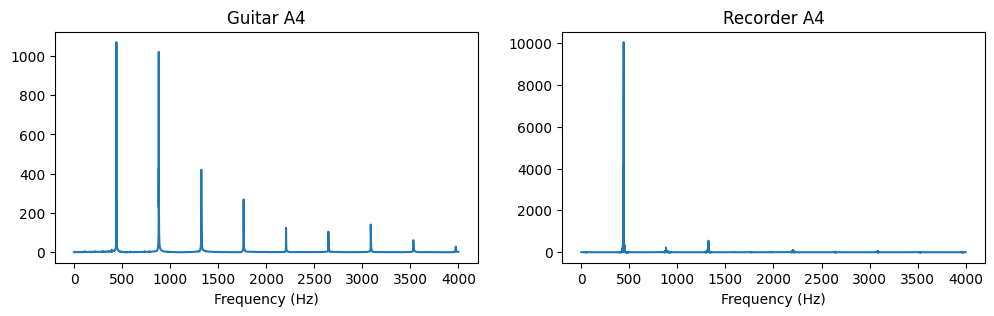

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

g_fft = rfft(g_data)
g_freq = rfftfreq(g_num, 1 / g_fs)
axes[0].plot(g_freq, np.abs(g_fft))
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_title('Guitar A4')


r_fft = rfft(r_data)
r_freq = rfftfreq(r_num, 1 / r_fs)
axes[1].plot(r_freq, np.abs(r_fft))
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_title('Recorder A4')

plt.show()

## Windowing Functions

### Hanning Window

Even N
$$
w(n) = \left\{
\begin{array}{ll}
0.5 - 0.5 \, cos \left( \frac{2 \pi n}{N} \right) & (0 \le n \le N-1)\\
0 & (otherwise)
\end{array}
\right.
$$

Odd N
$$
w(n) = \left\{
\begin{array}{ll}
0.5 - 0.5 \, cos \left( \frac{2 \pi (n + 0.5)}{N} \right) & (0 \le n \le N-1)\\
0 & (otherwise)
\end{array}
\right.
$$

Text(0.5, 1.0, 'Hanning Window')

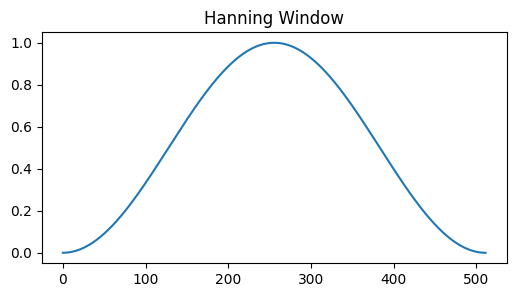

In [8]:
from scipy.signal.windows import hann

fig, ax = plt.subplots(figsize=(6, 3))
w_512 = hann(512)
ax.plot(w_512)
ax.set_title('Hanning Window')

Text(0, 0.5, 'Amplitude')

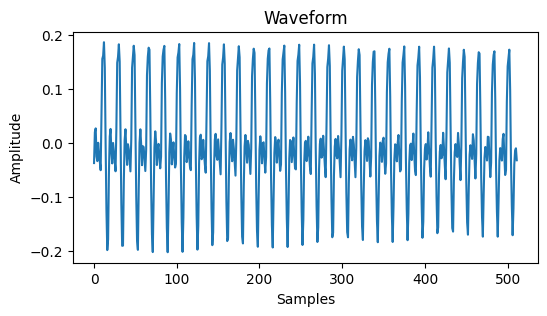

In [9]:
g_num_512 = 512
g_data_512 = g_data[10000:10000+g_num_512]

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(g_data_512)
ax.set_title('Waveform')
ax.set_xlabel('Samples')
ax.set_ylabel('Amplitude')

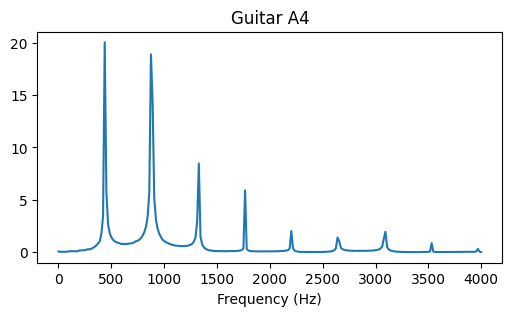

In [10]:
fig, ax = plt.subplots(figsize=(6, 3))

g_fft = rfft(g_data_512)
g_freq = rfftfreq(g_num_512, 1 / g_fs)
ax.plot(g_freq, np.abs(g_fft))
ax.set_xlabel('Frequency (Hz)')
ax.set_title('Guitar A4')

plt.show()

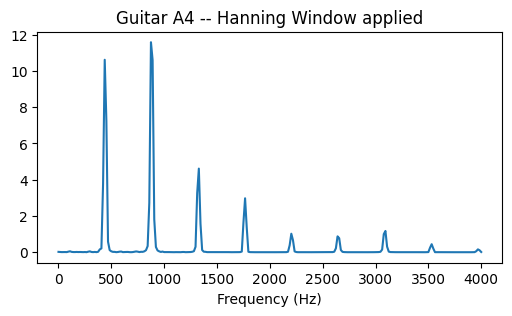

In [11]:
fig, ax = plt.subplots(figsize=(6, 3))

g_fft = rfft(g_data_512 * w_512)
g_freq = rfftfreq(g_num_512, 1 / g_fs)
ax.plot(g_freq, np.abs(g_fft))
ax.set_xlabel('Frequency (Hz)')
ax.set_title('Guitar A4 -- Hanning Window applied')

plt.show()